# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="  
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=134666dd0e2cc872e1f9ae630e853b34&units=Imperial&q='

In [4]:
# Add columns for lat, cloudiness, country, temp, date, humidity, lng, max temp, wind speed
cities_data=pd.DataFrame(cities)
cities_data['Cloudiness']=""
cities_data['Country']=""
cities_data['Lat']=""
cities_data['Lng']=" "
cities_data['Date']=""
cities_data['Humidity']=""
cities_data['Max temp']=""
cities_data['Wind speed']=""

cities_data = cities_data.rename(columns={0: "City name"})

In [5]:
print("Beginning Data Complete")
print("-------------------------")

# use iterrows to iterate through pandas dataframe
for index, row in cities_data.iterrows():
    city = row['City name']
    
    response = requests.get(query_url + city).json()
    
    try:
        
        print(f"Processing Record {index} Of Set {index}| {city}.")
        
        cities_data.loc[index,'City name'] = response ['name']
        cities_data.loc[index,'Cloudiness'] = response ['clouds']['all']
        cities_data.loc[index,'Country'] = response ['sys']['country']
        cities_data.loc[index,'Lat'] = response ['coord']['lat']
        cities_data.loc[index,'Lng'] = response ['coord']['lon']
        cities_data.loc[index,'Date'] = response ['dt']
        cities_data.loc[index,'Humidity'] = response ['main']['humidity']
        cities_data.loc[index,'Max temp'] = response ['main']['temp_max']
        cities_data.loc[index,'Wind speed'] = response ['wind']['speed']
        

    except (KeyError, IndexError):
        print("City Not Found. Skipping.")
        
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Complete
-------------------------
Processing Record 0 Of Set 0| punta arenas.
Processing Record 1 Of Set 1| rikitea.
Processing Record 2 Of Set 2| kapaa.
Processing Record 3 Of Set 3| yurginskoye.
Processing Record 4 Of Set 4| hohhot.
Processing Record 5 Of Set 5| chuy.
Processing Record 6 Of Set 6| khatanga.
Processing Record 7 Of Set 7| dikson.
Processing Record 8 Of Set 8| sahrak.
City Not Found. Skipping.
Processing Record 9 Of Set 9| ghatampur.
Processing Record 10 Of Set 10| pangai.
Processing Record 11 Of Set 11| mbanza-ngungu.
Processing Record 12 Of Set 12| cabo san lucas.
Processing Record 13 Of Set 13| cockburn town.
Processing Record 14 Of Set 14| port-gentil.
Processing Record 15 Of Set 15| arraial do cabo.
Processing Record 16 Of Set 16| busselton.
Processing Record 17 Of Set 17| hobart.
Processing Record 18 Of Set 18| tomatlan.
Processing Record 19 Of Set 19| taltal.
Processing Record 20 Of Set 20| barrow.
Processing Record 21 Of Set 21| saint-philippe.
P

Processing Record 179 Of Set 179| nizhneyansk.
City Not Found. Skipping.
Processing Record 180 Of Set 180| kavaratti.
Processing Record 181 Of Set 181| saint-denis.
Processing Record 182 Of Set 182| ostersund.
Processing Record 183 Of Set 183| qasigiannguit.
Processing Record 184 Of Set 184| nishihara.
Processing Record 185 Of Set 185| faanui.
Processing Record 186 Of Set 186| qorveh.
Processing Record 187 Of Set 187| el viejo.
Processing Record 188 Of Set 188| le pradet.
Processing Record 189 Of Set 189| minchinabad.
Processing Record 190 Of Set 190| kutum.
Processing Record 191 Of Set 191| asau.
City Not Found. Skipping.
Processing Record 192 Of Set 192| illoqqortoormiut.
City Not Found. Skipping.
Processing Record 193 Of Set 193| betma.
Processing Record 194 Of Set 194| torbay.
Processing Record 195 Of Set 195| lorengau.
Processing Record 196 Of Set 196| mandalgovi.
Processing Record 197 Of Set 197| bulawayo.
Processing Record 198 Of Set 198| tilichiki.
Processing Record 199 Of Set 

Processing Record 354 Of Set 354| hokitika.
Processing Record 355 Of Set 355| nizwa.
Processing Record 356 Of Set 356| warrington.
Processing Record 357 Of Set 357| padang.
Processing Record 358 Of Set 358| pokhara.
Processing Record 359 Of Set 359| nyuksenitsa.
Processing Record 360 Of Set 360| ordzhonikidze.
Processing Record 361 Of Set 361| zhanakorgan.
Processing Record 362 Of Set 362| suraabad.
Processing Record 363 Of Set 363| bereda.
Processing Record 364 Of Set 364| caravelas.
Processing Record 365 Of Set 365| conceicao do araguaia.
Processing Record 366 Of Set 366| charleston.
Processing Record 367 Of Set 367| kavieng.
Processing Record 368 Of Set 368| puerto madryn.
Processing Record 369 Of Set 369| pallasovka.
Processing Record 370 Of Set 370| ponta do sol.
Processing Record 371 Of Set 371| buraydah.
Processing Record 372 Of Set 372| usinsk.
Processing Record 373 Of Set 373| piryion.
City Not Found. Skipping.
Processing Record 374 Of Set 374| cayenne.
Processing Record 375 O

Processing Record 530 Of Set 530| koboldo.
City Not Found. Skipping.
Processing Record 531 Of Set 531| kenai.
Processing Record 532 Of Set 532| kiruna.
Processing Record 533 Of Set 533| tocopilla.
Processing Record 534 Of Set 534| salalah.
Processing Record 535 Of Set 535| rincon.
Processing Record 536 Of Set 536| savannah bight.
Processing Record 537 Of Set 537| lancaster.
Processing Record 538 Of Set 538| pak phanang.
Processing Record 539 Of Set 539| saint-georges.
Processing Record 540 Of Set 540| mantenopolis.
Processing Record 541 Of Set 541| inongo.
Processing Record 542 Of Set 542| berlevag.
Processing Record 543 Of Set 543| broome.
Processing Record 544 Of Set 544| kaitangata.
Processing Record 545 Of Set 545| loharu.
Processing Record 546 Of Set 546| stephenville.
Processing Record 547 Of Set 547| ucluelet.
Processing Record 548 Of Set 548| igarka.
Processing Record 549 Of Set 549| tateyama.
Processing Record 550 Of Set 550| moerai.
Processing Record 551 Of Set 551| morant ba

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_data.dropna(inplace = True) 
print(cities_data)

             City name Cloudiness Country    Lat     Lng        Date Humidity  \
0         Punta Arenas         75      CL -53.16  -70.91  1569879947       52   
1              Rikitea        100      PF -23.12 -134.97  1569879947       74   
2                Kapaa         75      US  22.08 -159.32  1569879947       66   
3          Yurginskoye         53      RU  56.82   67.39  1569879948       92   
4               Hohhot          0      CN  40.81  111.65  1569879948       81   
5                 Chuy        100      UY -33.69  -53.46  1569879948       73   
6             Khatanga          3      RU  71.98  102.47  1569879948       90   
7               Dikson         51      RU  73.51   80.55  1569879837       86   
8               sahrak                                                          
9            Ghatampur         39      IN  26.16   80.17  1569879949       88   
10              Pangai         75      TO  -19.8 -174.35  1569879949       83   
11       Mbanza-Ngungu      

In [7]:
cities_data.count()

City name     623
Cloudiness    623
Country       623
Lat           623
Lng           623
Date          623
Humidity      623
Max temp      623
Wind speed    623
dtype: int64

In [8]:
cities_data.head()

,City name,Cloudiness,Country,Lat,Lng,Date,Humidity,Max temp,Wind speed
0,Punta Arenas,75,CL,-53.16,-70.91,1569879947,52,41,16.11
1,Rikitea,100,PF,-23.12,-134.97,1569879947,74,69.17,14.76
2,Kapaa,75,US,22.08,-159.32,1569879947,66,86,17.22
3,Yurginskoye,53,RU,56.82,67.39,1569879948,92,34.61,5.55
4,Hohhot,0,CN,40.81,111.65,1569879948,81,53.6,2.24


In [9]:
cities_data = cities_data.convert_objects(convert_numeric=True)
cities_data.dtypes

/Users/adeliamanuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


City name      object
Cloudiness    float64
Country        object
Lat           float64
Lng           float64
Date          float64
Humidity      float64
Max temp      float64
Wind speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

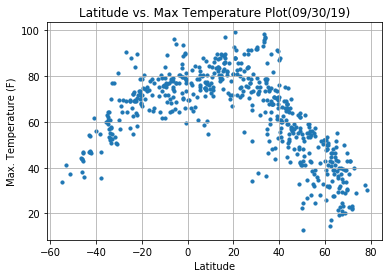

In [10]:
# Build a scatter plot for each data type
plt.scatter(cities_data["Lat"], cities_data["Max temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature Plot(09/30/19)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVSTemperature.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

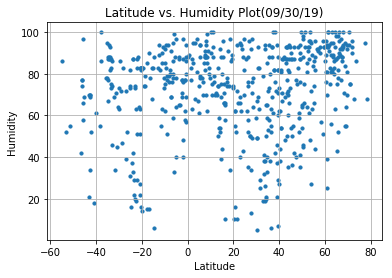

In [11]:
# Build a scatter plot for each data type
plt.scatter(cities_data["Lat"], cities_data["Humidity"], marker="o",s=10)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity Plot(09/30/19)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

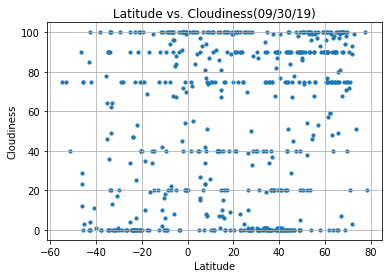

In [12]:
# Build a scatter plot for each data type
plt.scatter(cities_data["Lat"], cities_data["Cloudiness"], marker="o",s=10)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness(09/30/19)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

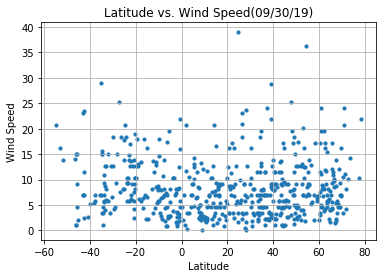

In [13]:
# Build a scatter plot for each data type
plt.scatter(cities_data["Lat"], cities_data["Wind speed"], marker="o",s=10)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed(09/30/19)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsWindSpeed.png")

# Show plot
plt.show()

In [14]:
#-----------Analysis----------------------
#Figure 1 for latitude vs temperature
# It looks like Latitude and temperature increases at the same time. 
#Or one depends on the other to either increase or decreased.

# Figure 2 latitude vs humidity
# For this figure, looks like the humidity and latitude is pretty high. 
#The regions are more diversified than the first figure.

# Figure 4 latitude vs wind speed
# In this figure, the wind speed is low. Most of the datas are down 20mph.